<a href="https://colab.research.google.com/github/igcampos/Mestrado/blob/main/analise_de_sensibilidade_prog_um.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Sensibilidade do Programa I

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import sys
from collections.abc import Iterable
import timeit

In [ ]:
#Discretização do domínio 
nx = 100                                                              #Número de pontos do grid
dominio = np.arange(nx)                                                #vetor domínio
print("Número de dimensões: {}".format(dominio.ndim))                  #número de dimensões
print(dominio)

Número de dimensões: 1
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [ ]:
#Calculo de Delta X
#tamanho do meio poroso
tam_meio_poroso = 5000 #ft
#tamanho do elemento do grid
tam_grid = tam_meio_poroso/nx
#Delta X - normalizado
dx = tam_grid/tam_meio_poroso
print("O tamanho dos elementos do grid em uma malha estruturada é {}, e o delta X é {} ".format(tam_grid, dx))

O tamanho dos elementos do grid em uma malha estruturada é 50.0, e o delta X é 0.01 


In [ ]:
#Calculo de Delta T
#viscosidade da água 
visc_agua = 0.5 #cp
#viscosidade do óleo
visc_oleo = 1 #cp
#velocidade total na injeção 
ut = 0.1 #ft³/d 
#porosidade
porosidade_meio = 0.2
#tempo de simulação 
nt = 4000 #dias
#passo de tempo
passo_tempo = 10 #dias
#Delta T - normalizado
dt =  ut*passo_tempo/(tam_meio_poroso*porosidade_meio) 
print("O delta T normalizado é {}".format(dt))

O delta T normalizado é 0.001


In [ ]:
#Número de Courant
num_Courant = dt/dx 
print(f"O número de courant é {num_Courant}")

O número de courant é 0.1


In [ ]:
#Características do sistema molhável a água
#saturação inicial
swi = 0.2
#saturação de óleo residual
sor = 0.2
#permeabilidade relativa da água na saturação residual
krw_sor = 0.3 
#permeabilidade relativa do óleo na saturação residual
kro_swi = 0.85 
#porosidade
porosidade = porosidade_meio
#parâmetros de Corey
#no = 3
#nw = 6

In [ ]:
#condição de contorno e inicial
#Condição Inicial Sw(X,0)
sw_CI = swi 
#Condição de Contorno Sw(0,T)
sw_CC = 1-sor 
#Matriz de saturação para alocação dos resultados
tempos_de_injecao = int(nt/passo_tempo)   #quantidade representando os tempos de injeção que serão calculados
matriz_resultado_saturacao = np.zeros((tempos_de_injecao,nx)) 
matriz_resultado_saturacao.shape 

(400, 100)

In [ ]:
#modificando a primeira linha da matriz para alocar os valores das condições iniciais
matriz_resultado_saturacao[0,:] = sw_CI 

In [ ]:
matriz_resultado_saturacao[0,:] 

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2])

In [ ]:
tempos_de_injecao = np.arange(tempos_de_injecao) #utilizado como vetor de tempo para o calculo de saturação
tempos_de_injecao

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
#função para o cálculo do modelo Corey - AJUSTADO

def perm_corey(sw,swi,sor,kro_swi,krw_sor,no,nw):
  kro = []
  krw = []

  if isinstance(sw, Iterable):
    #cálculo da permeabilidade relativa do óleo 
    for i in sw:
        kr = kro_swi*((1-sor-i)/(1-swi-sor))**no
        kro.append(kr)
    kro = np.array([kro_swi if i >= 1 else i for i in kro]) #substituindo o valor 1 por kro_swi
    kro[-1] = 0.0 # solução temporária para o erro 

    #cálculo da permeabilidade relativa da água
    for i in sw:
        kr = krw_sor*((i-swi)/(1-swi-sor))**nw
        if kr > krw_sor:
          kr = krw_sor
        krw.append(kr)
    krw = np.array(krw)


  else:
    #cálculo da permeabilidade relativa do óleo
    kr = kro_swi*((1-sor-sw)/(1-swi-sor))**no
    if kr > kro_swi:
      kr = kro_swi
    kro.append(kr)
    kro = np.array(kro) 
    #cálculo da permeabilidade relativa da água 
    kr = krw_sor*((sw-swi)/(1-swi-sor))**nw
    if kr > krw_sor:
      kr = krw_sor
    krw.append(kr)
    krw = np.array(krw)
  
  return kro, krw

#função que calcula a mobilidade em diferentes pontos de saturação
def mobilidade(sw,visc_agua,visc_oleo):

  numerador_da_funcao = perm_corey(sw,swi,sor,kro_swi,krw_sor,no,nw)[1]/visc_agua
  denominador_da_funcao = (perm_corey(sw,swi,sor,kro_swi,krw_sor,no,nw)[1]/visc_agua) + (perm_corey(sw,swi,sor,kro_swi,krw_sor,no,nw)[0]/visc_oleo)
  resultado_mobilidade =  numerador_da_funcao/denominador_da_funcao

  return resultado_mobilidade

In [ ]:
#Calculo da saturação explicitamente utilizando o método single point upstream (ϕ=0)
#calulo do tempo de execução:
start = timeit.default_timer()
for n in tempos_de_injecao:
  #calculo da primeira linha
  if n == 0:
    for i in dominio:
      if i == 0: 
        #primeiro ponto
        mobilidade_i_menos_meio = mobilidade(sw_CC,visc_agua,visc_oleo)
        mobilidade_i = mobilidade(sw_CI,visc_agua,visc_oleo)
        sw_n_mais_1 = dt/dx*(mobilidade_i_menos_meio - mobilidade_i) + sw_CI
        matriz_resultado_saturacao[n,i] =  sw_n_mais_1
      else:
        #outros ponto
        sw_ajustado =  sw_CI
        mobilidade_i_menos_meio = mobilidade(sw_ajustado,visc_agua,visc_oleo)
        mobilidade_i = mobilidade(sw_CI,visc_agua,visc_oleo)
        sw_n_mais_1 = dt/dx * (mobilidade_i_menos_meio - mobilidade_i) + sw_CI
        matriz_resultado_saturacao[n,i] =  sw_n_mais_1
  #Cálculo das demais linhas      
  else:
      for i in dominio:
        if i == 0: 
          #primeiro ponto
          mobilidade_i_menos_meio = mobilidade(sw_CC,visc_agua,visc_oleo)
          mobilidade_i = mobilidade(matriz_resultado_saturacao[n-1,i],visc_agua,visc_oleo)
          sw_n_mais_1 = dt/dx*(mobilidade_i_menos_meio - mobilidade_i) + matriz_resultado_saturacao[n-1,i]
          matriz_resultado_saturacao[n,i] =  sw_n_mais_1
        else:
          #outros ponto
          sw_ajustado =  matriz_resultado_saturacao[n-1,i-1] 
          mobilidade_i_menos_meio = mobilidade(sw_ajustado,visc_agua,visc_oleo)
          mobilidade_i = mobilidade(matriz_resultado_saturacao[n-1,i],visc_agua,visc_oleo)
          sw_n_mais_1 = dt/dx * (mobilidade_i_menos_meio - mobilidade_i) + matriz_resultado_saturacao[n-1,i]
          matriz_resultado_saturacao[n,i] =  sw_n_mais_1
matriz_resultado_saturacao_single_point = matriz_resultado_saturacao
stop = timeit.default_timer()
print('Tempo de execução: {} segundos'.format(stop-start))

Tempo de execução: 2.224633874999199 segundos


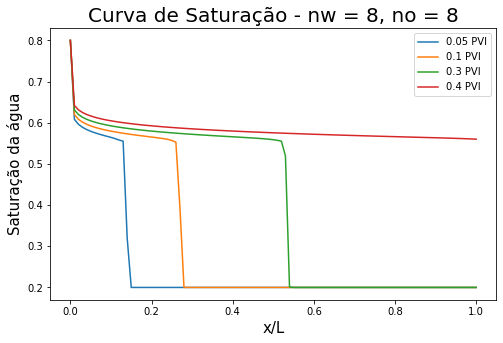

In [ ]:
#plotar os resultados
matriz_resultado_saturacao_single_point = np.insert(matriz_resultado_saturacao_single_point, 0, values = 0.8, axis=1) #Adicionando o ponto referente a condição de contorno
vetor_comprimento = np.linspace(0, 1, nx+1)
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(1,1,1)

#PVI utilizados nos labels
td_label_1= ut*500/(tam_meio_poroso*porosidade_meio)
td_label_2= ut*1000/(tam_meio_poroso*porosidade_meio)
td_label_3= ut*3000/(tam_meio_poroso*porosidade_meio)
td_label_4= ut*4000/(tam_meio_poroso*porosidade_meio)

ax.plot(vetor_comprimento, matriz_resultado_saturacao_single_point[49], label = "{} PVI".format(td_label_1))
ax.plot(vetor_comprimento, matriz_resultado_saturacao_single_point[99], label = "{} PVI".format(td_label_2))
ax.plot(vetor_comprimento, matriz_resultado_saturacao_single_point[199], label = "{} PVI".format(td_label_3))
ax.plot(vetor_comprimento, matriz_resultado_saturacao_single_point[399], label = "{} PVI".format(td_label_4))


ax.set_xlabel("x/L", fontsize=15)
ax.set_ylabel("Saturação da água", fontsize=15)
plt.title("Curva de Saturação - nw = {}, no = {}".format(nw,no), fontsize=20)
ax.legend(loc="upper right")
plt.show()

Curva de permeabilidade

In [ ]:
vetor_saturacao = np.arange(swi,1-sor,0.01)
vetor_saturacao

array([0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 ,
       0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41,
       0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52,
       0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63,
       0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74,
       0.75, 0.76, 0.77, 0.78, 0.79, 0.8 ])

In [ ]:
kro, krw = perm_corey(vetor_saturacao,swi,sor,kro_swi,krw_sor,no,nw)

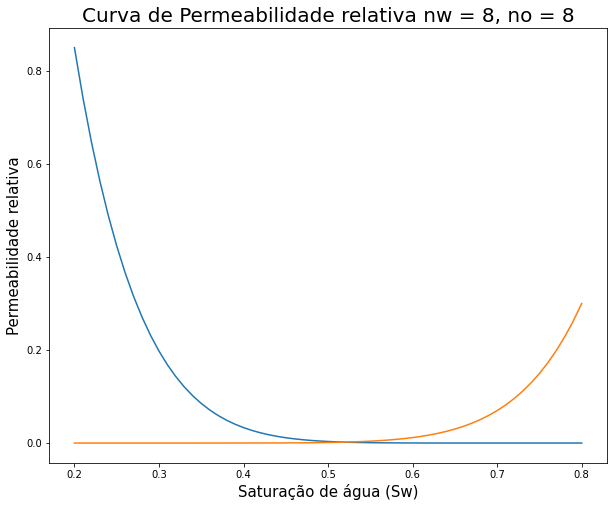

In [ ]:
#Curva de permeabilidade
fig = plt.figure(figsize=(10,8))

plt.plot(vetor_saturacao,kro)
plt.plot(vetor_saturacao,krw)

plt.xlabel("Saturação de água (Sw)", fontsize = 15)
plt.ylabel("Permeabilidade relativa", fontsize = 15)
plt.title("Curva de Permeabilidade relativa nw = {}, no = {}".format(nw,no), fontsize = 20)
plt.show()

## Análise do refino da malha





In [ ]:
#armazenando os vetores com os diferentes refino de 0,2 PVI
nx_100 = matriz_resultado_saturacao_single_point[199] #pronto

In [ ]:
nx_10 = matriz_resultado_saturacao_single_point[199] #pronto

In [ ]:
nx_20 = matriz_resultado_saturacao_single_point[199] #pronto

In [ ]:
nx_30 = matriz_resultado_saturacao_single_point[199] #pronto

In [ ]:
nx_40 = matriz_resultado_saturacao_single_point[199] #pronto

In [ ]:
nx_50 = matriz_resultado_saturacao_single_point[199] #pronto

In [ ]:
nx_60 = matriz_resultado_saturacao_single_point[199] #pronto

In [ ]:
nx_70 = matriz_resultado_saturacao_single_point[199] #pronto

In [ ]:
nx_80 = matriz_resultado_saturacao_single_point[199] #pronto

In [ ]:
nx_90 = matriz_resultado_saturacao_single_point[199] #pronto

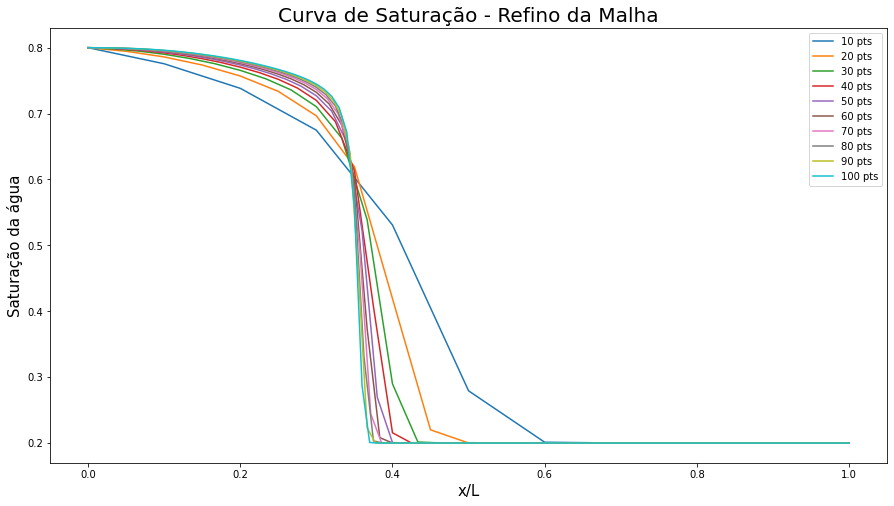

In [ ]:
#Gráfico analisando o refino da malha
#Adicionando o ponto referente a condição de contorno
#matriz_resultado_saturacao_single_point = np.insert(matriz_resultado_saturacao_single_point, 0, values = 0.8, axis=1) 
vetor_comprimento_10 = np.linspace(0, 1, 10+1)
vetor_comprimento_20 = np.linspace(0, 1, 20+1)
vetor_comprimento_30 = np.linspace(0, 1, 30+1)
vetor_comprimento_40 = np.linspace(0, 1, 40+1)
vetor_comprimento_50 = np.linspace(0, 1, 50+1)
vetor_comprimento_60 = np.linspace(0, 1, 60+1)
vetor_comprimento_70 = np.linspace(0, 1, 70+1)
vetor_comprimento_80 = np.linspace(0, 1, 80+1)
vetor_comprimento_90 = np.linspace(0, 1, 90+1)
vetor_comprimento_100 = np.linspace(0, 1, 100+1)

fig = plt.figure(figsize=(15,8))
ax = plt.subplot(1,1,1)


ax.plot(vetor_comprimento_10, nx_10, label = "10 pts")
ax.plot(vetor_comprimento_20, nx_20, label = "20 pts")
ax.plot(vetor_comprimento_30, nx_30, label = "30 pts")
ax.plot(vetor_comprimento_40, nx_40, label = "40 pts")
ax.plot(vetor_comprimento_50, nx_50, label = "50 pts")
ax.plot(vetor_comprimento_60, nx_60, label = "60 pts")
ax.plot(vetor_comprimento_70, nx_70, label = "70 pts")
ax.plot(vetor_comprimento_80, nx_80, label = "80 pts")
ax.plot(vetor_comprimento_90, nx_90, label = "90 pts")
ax.plot(vetor_comprimento_100, nx_100, label = "100 pts")



ax.set_xlabel("x/L", fontsize=15)
ax.set_ylabel("Saturação da água", fontsize=15)
plt.title("Curva de Saturação - Refino da Malha", fontsize=20)
ax.legend(loc="upper right")
plt.show()

In [ ]:
#análise com 100, 200, 300 e 400 pontos
nx_200 = matriz_resultado_saturacao_single_point[199] #pronto

In [ ]:
nx_300 = matriz_resultado_saturacao_single_point[199] #pronto

In [ ]:
nx_400 = matriz_resultado_saturacao_single_point[199] #pronto

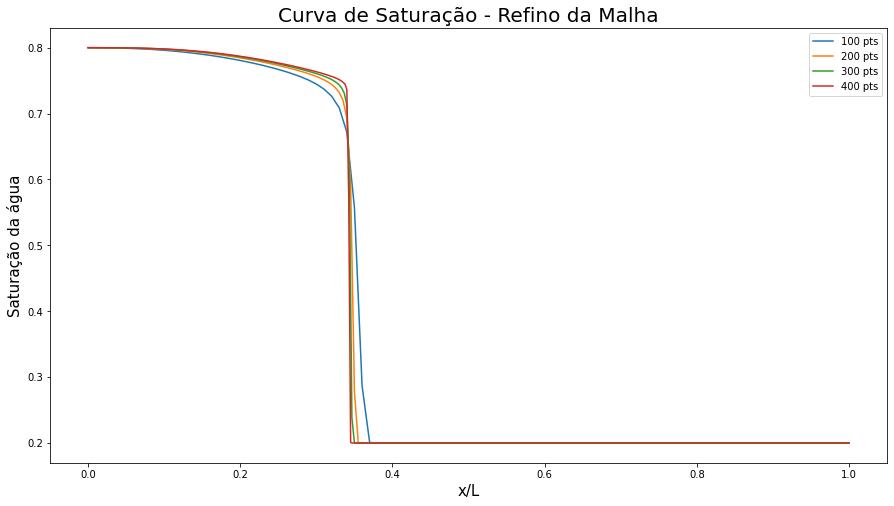

In [ ]:
#Gráfico analisando o refino da malha
#Adicionando o ponto referente a condição de contorno
#matriz_resultado_saturacao_single_point = np.insert(matriz_resultado_saturacao_single_point, 0, values = 0.8, axis=1) 

vetor_comprimento_200 = np.linspace(0, 1, 200+1)
vetor_comprimento_300 = np.linspace(0, 1, 300+1)
vetor_comprimento_400 = np.linspace(0, 1, 400+1)
vetor_comprimento_100 = np.linspace(0, 1, 100+1)

fig = plt.figure(figsize=(15,8))
ax = plt.subplot(1,1,1)

ax.plot(vetor_comprimento_100, nx_100, label = "100 pts")
ax.plot(vetor_comprimento_200, nx_200, label = "200 pts")
ax.plot(vetor_comprimento_300, nx_300, label = "300 pts")
ax.plot(vetor_comprimento_400, nx_400, label = "400 pts")



ax.set_xlabel("x/L", fontsize=15)
ax.set_ylabel("Saturação da água", fontsize=15)
plt.title("Curva de Saturação - Refino da Malha", fontsize=20)
ax.legend(loc="upper right")
plt.show()

## Análise dos parâmetros de Corey

### nw=no

In [ ]:
nw_no_2 = matriz_resultado_saturacao_single_point #pronto

In [ ]:
nw_no_3 = matriz_resultado_saturacao_single_point #pronto

In [ ]:
nw_no_4 = matriz_resultado_saturacao_single_point #pronto

In [ ]:
nw_no_5 = matriz_resultado_saturacao_single_point #pronto

In [ ]:
nw_no_6 = matriz_resultado_saturacao_single_point #pronto

In [ ]:
nw_no_7 = matriz_resultado_saturacao_single_point #pronto

In [ ]:
nw_no_8 = matriz_resultado_saturacao_single_point #pronto

In [ ]:
#Parâmetros de Corey nw=no
# nw = 2,4,6,8
nw = 8
no = nw



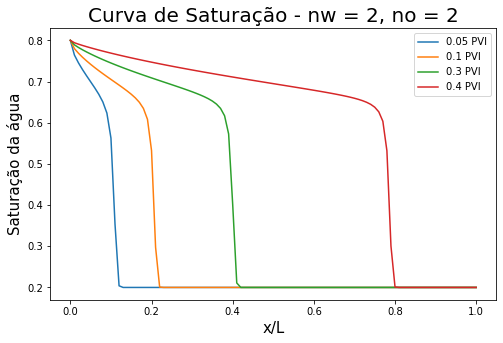

In [ ]:
#nw=no=2
#matriz_resultado_saturacao_single_point = np.insert(matriz_resultado_saturacao_single_point, 0, values = 0.8, axis=1) #Adicionando o ponto referente a condição de contorno
vetor_comprimento = np.linspace(0, 1, nx+1)
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(1,1,1)

#PVI utilizados nos labels
td_label_1= ut*500/(tam_meio_poroso*porosidade_meio)
td_label_2= ut*1000/(tam_meio_poroso*porosidade_meio)
td_label_3= ut*3000/(tam_meio_poroso*porosidade_meio)
td_label_4= ut*4000/(tam_meio_poroso*porosidade_meio)

ax.plot(vetor_comprimento, nw_no_2[49], label = "{} PVI".format(td_label_1))
ax.plot(vetor_comprimento, nw_no_2[99], label = "{} PVI".format(td_label_2))
ax.plot(vetor_comprimento, nw_no_2[199], label = "{} PVI".format(td_label_3))
ax.plot(vetor_comprimento, nw_no_2[399], label = "{} PVI".format(td_label_4))


ax.set_xlabel("x/L", fontsize=15)
ax.set_ylabel("Saturação da água", fontsize=15)
plt.title("Curva de Saturação - nw = {}, no = {}".format(nw,no), fontsize=20)
ax.legend(loc="upper right")
plt.show()

Curva de permeabilidade nw=no=2

In [ ]:
kro_no_nw_2 = kro
krw_no_nw_2 = krw

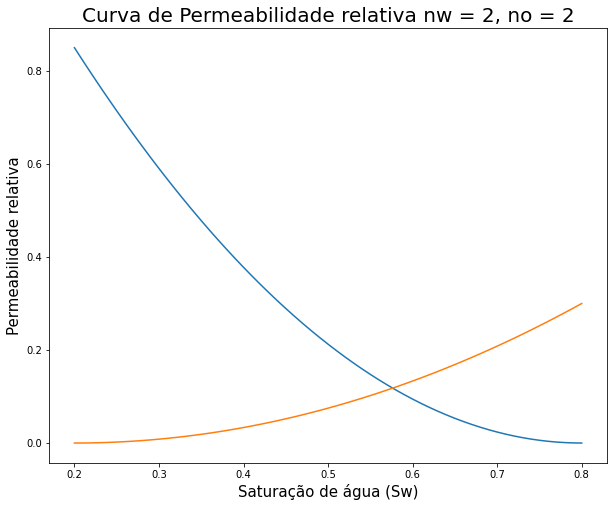

In [ ]:
#Curva de permeabilidade
fig = plt.figure(figsize=(10,8))

plt.plot(vetor_saturacao,kro_no_nw_2)
plt.plot(vetor_saturacao,krw_no_nw_2)

plt.xlabel("Saturação de água (Sw)", fontsize = 15)
plt.ylabel("Permeabilidade relativa", fontsize = 15)
plt.title("Curva de Permeabilidade relativa nw = {}, no = {}".format(nw,no), fontsize = 20)
plt.show()

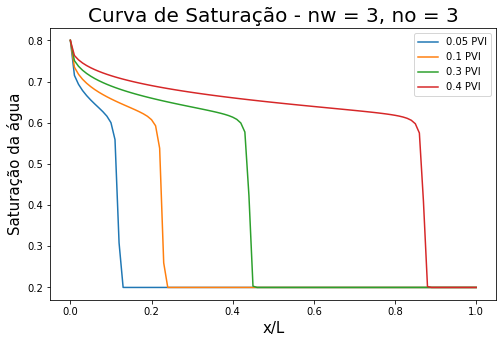

In [ ]:
#nw=no=3
#matriz_resultado_saturacao_single_point = np.insert(matriz_resultado_saturacao_single_point, 0, values = 0.8, axis=1) #Adicionando o ponto referente a condição de contorno
vetor_comprimento = np.linspace(0, 1, nx+1)
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(1,1,1)

#PVI utilizados nos labels
td_label_1= ut*500/(tam_meio_poroso*porosidade_meio)
td_label_2= ut*1000/(tam_meio_poroso*porosidade_meio)
td_label_3= ut*3000/(tam_meio_poroso*porosidade_meio)
td_label_4= ut*4000/(tam_meio_poroso*porosidade_meio)

ax.plot(vetor_comprimento, nw_no_3[49], label = "{} PVI".format(td_label_1))
ax.plot(vetor_comprimento, nw_no_3[99], label = "{} PVI".format(td_label_2))
ax.plot(vetor_comprimento, nw_no_3[199], label = "{} PVI".format(td_label_3))
ax.plot(vetor_comprimento, nw_no_3[399], label = "{} PVI".format(td_label_4))


ax.set_xlabel("x/L", fontsize=15)
ax.set_ylabel("Saturação da água", fontsize=15)
plt.title("Curva de Saturação - nw = {}, no = {}".format(nw,no), fontsize=20)
ax.legend(loc="upper right")
plt.show()

Curva de permeabilidade nw=no=3

In [ ]:
kro_no_nw_3 = kro
krw_no_nw_3 = krw

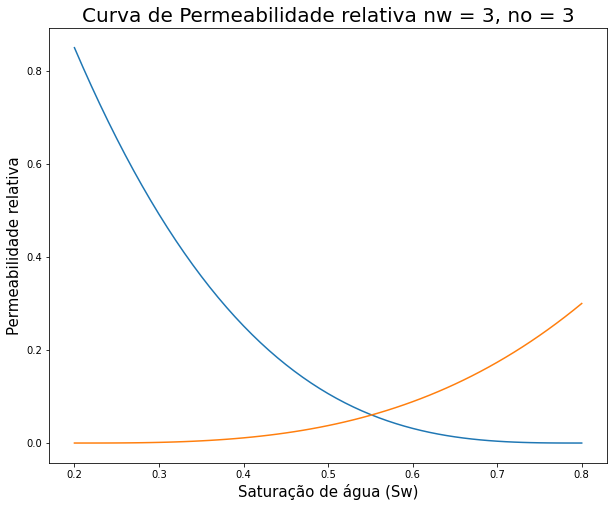

In [ ]:
#Curva de permeabilidade
fig = plt.figure(figsize=(10,8))

plt.plot(vetor_saturacao,kro_no_nw_3)
plt.plot(vetor_saturacao,krw_no_nw_3)

plt.xlabel("Saturação de água (Sw)", fontsize = 15)
plt.ylabel("Permeabilidade relativa", fontsize = 15)
plt.title("Curva de Permeabilidade relativa nw = {}, no = {}".format(nw,no), fontsize = 20)
plt.show()

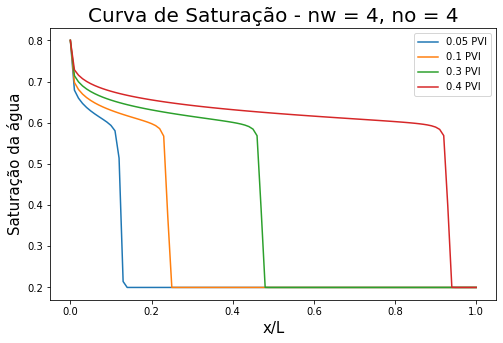

In [ ]:
#nw=no=4
#matriz_resultado_saturacao_single_point = np.insert(matriz_resultado_saturacao_single_point, 0, values = 0.8, axis=1) #Adicionando o ponto referente a condição de contorno
vetor_comprimento = np.linspace(0, 1, nx+1)
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(1,1,1)

#PVI utilizados nos labels
td_label_1= ut*500/(tam_meio_poroso*porosidade_meio)
td_label_2= ut*1000/(tam_meio_poroso*porosidade_meio)
td_label_3= ut*3000/(tam_meio_poroso*porosidade_meio)
td_label_4= ut*4000/(tam_meio_poroso*porosidade_meio)

ax.plot(vetor_comprimento, nw_no_4[49], label = "{} PVI".format(td_label_1))
ax.plot(vetor_comprimento, nw_no_4[99], label = "{} PVI".format(td_label_2))
ax.plot(vetor_comprimento, nw_no_4[199], label = "{} PVI".format(td_label_3))
ax.plot(vetor_comprimento, nw_no_4[399], label = "{} PVI".format(td_label_4))


ax.set_xlabel("x/L", fontsize=15)
ax.set_ylabel("Saturação da água", fontsize=15)
plt.title("Curva de Saturação - nw = {}, no = {}".format(nw,no), fontsize=20)
ax.legend(loc="upper right")
plt.show()

Curva de permeabilidade nw=no=4

In [ ]:
kro_no_nw_4 = kro
krw_no_nw_4 = krw

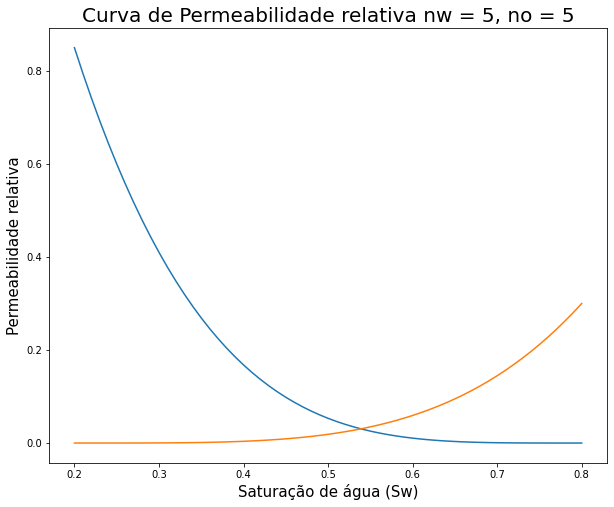

In [ ]:
#Curva de permeabilidade
fig = plt.figure(figsize=(10,8))

plt.plot(vetor_saturacao,kro_no_nw_4)
plt.plot(vetor_saturacao,krw_no_nw_4)

plt.xlabel("Saturação de água (Sw)", fontsize = 15)
plt.ylabel("Permeabilidade relativa", fontsize = 15)
plt.title("Curva de Permeabilidade relativa nw = {}, no = {}".format(nw,no), fontsize = 20)
plt.show()

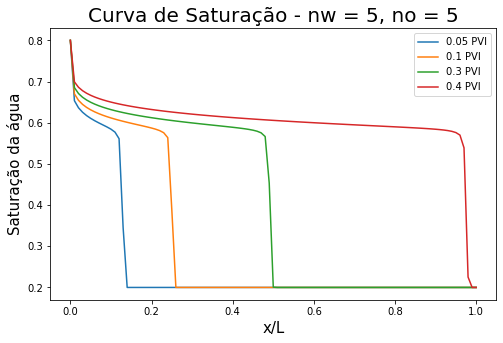

In [ ]:
#nw=no=5
#matriz_resultado_saturacao_single_point = np.insert(matriz_resultado_saturacao_single_point, 0, values = 0.8, axis=1) #Adicionando o ponto referente a condição de contorno
vetor_comprimento = np.linspace(0, 1, nx+1)
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(1,1,1)

#PVI utilizados nos labels
td_label_1= ut*500/(tam_meio_poroso*porosidade_meio)
td_label_2= ut*1000/(tam_meio_poroso*porosidade_meio)
td_label_3= ut*3000/(tam_meio_poroso*porosidade_meio)
td_label_4= ut*4000/(tam_meio_poroso*porosidade_meio)

ax.plot(vetor_comprimento, nw_no_5[49], label = "{} PVI".format(td_label_1))
ax.plot(vetor_comprimento, nw_no_5[99], label = "{} PVI".format(td_label_2))
ax.plot(vetor_comprimento, nw_no_5[199], label = "{} PVI".format(td_label_3))
ax.plot(vetor_comprimento, nw_no_5[399], label = "{} PVI".format(td_label_4))


ax.set_xlabel("x/L", fontsize=15)
ax.set_ylabel("Saturação da água", fontsize=15)
plt.title("Curva de Saturação - nw = {}, no = {}".format(nw,no), fontsize=20)
ax.legend(loc="upper right")
plt.show()

Curva de permeabilidade nw=no=5

In [ ]:
kro_no_nw_5 = kro
krw_no_nw_5 = krw

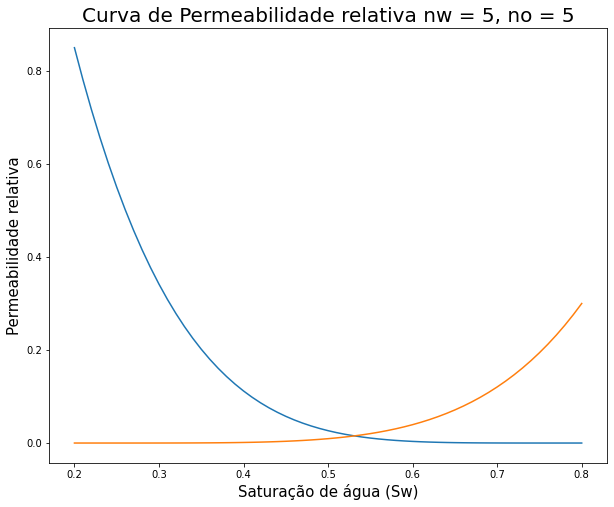

In [ ]:
#Curva de permeabilidade
fig = plt.figure(figsize=(10,8))

plt.plot(vetor_saturacao,kro_no_nw_5)
plt.plot(vetor_saturacao,krw_no_nw_5)

plt.xlabel("Saturação de água (Sw)", fontsize = 15)
plt.ylabel("Permeabilidade relativa", fontsize = 15)
plt.title("Curva de Permeabilidade relativa nw = {}, no = {}".format(nw,no), fontsize = 20)
plt.show()

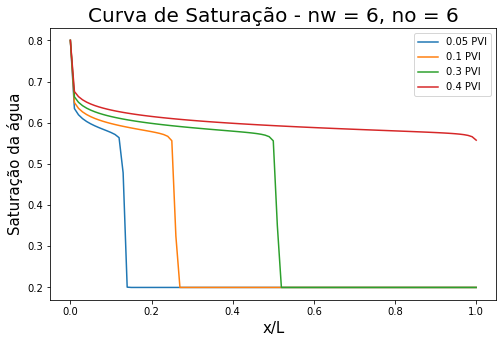

In [ ]:
#nw=no=6
#matriz_resultado_saturacao_single_point = np.insert(matriz_resultado_saturacao_single_point, 0, values = 0.8, axis=1) #Adicionando o ponto referente a condição de contorno
vetor_comprimento = np.linspace(0, 1, nx+1)
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(1,1,1)

#PVI utilizados nos labels
td_label_1= ut*500/(tam_meio_poroso*porosidade_meio)
td_label_2= ut*1000/(tam_meio_poroso*porosidade_meio)
td_label_3= ut*3000/(tam_meio_poroso*porosidade_meio)
td_label_4= ut*4000/(tam_meio_poroso*porosidade_meio)

ax.plot(vetor_comprimento, nw_no_6[49], label = "{} PVI".format(td_label_1))
ax.plot(vetor_comprimento, nw_no_6[99], label = "{} PVI".format(td_label_2))
ax.plot(vetor_comprimento, nw_no_6[199], label = "{} PVI".format(td_label_3))
ax.plot(vetor_comprimento, nw_no_6[399], label = "{} PVI".format(td_label_4))


ax.set_xlabel("x/L", fontsize=15)
ax.set_ylabel("Saturação da água", fontsize=15)
plt.title("Curva de Saturação - nw = {}, no = {}".format(nw,no), fontsize=20)
ax.legend(loc="upper right")
plt.show()

Curva de permeabilidade nw=no=6

In [ ]:
kro_no_nw_6 = kro
krw_no_nw_6 = krw

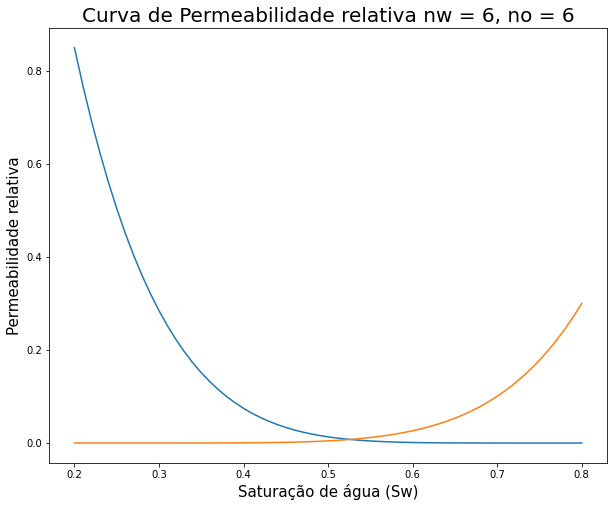

In [ ]:
#Curva de permeabilidade
fig = plt.figure(figsize=(10,8))

plt.plot(vetor_saturacao,kro_no_nw_6)
plt.plot(vetor_saturacao,krw_no_nw_6)

plt.xlabel("Saturação de água (Sw)", fontsize = 15)
plt.ylabel("Permeabilidade relativa", fontsize = 15)
plt.title("Curva de Permeabilidade relativa nw = {}, no = {}".format(nw,no), fontsize = 20)
plt.show()

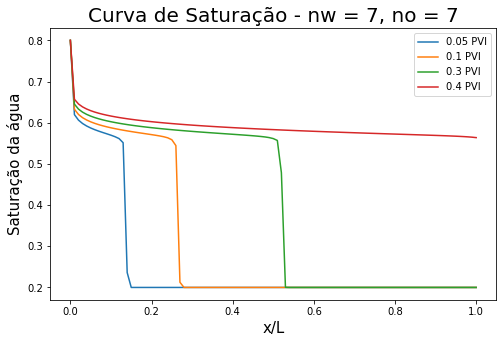

In [ ]:
#nw=no=7
#matriz_resultado_saturacao_single_point = np.insert(matriz_resultado_saturacao_single_point, 0, values = 0.8, axis=1) #Adicionando o ponto referente a condição de contorno
vetor_comprimento = np.linspace(0, 1, nx+1)
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(1,1,1)

#PVI utilizados nos labels
td_label_1= ut*500/(tam_meio_poroso*porosidade_meio)
td_label_2= ut*1000/(tam_meio_poroso*porosidade_meio)
td_label_3= ut*3000/(tam_meio_poroso*porosidade_meio)
td_label_4= ut*4000/(tam_meio_poroso*porosidade_meio)

ax.plot(vetor_comprimento, nw_no_7[49], label = "{} PVI".format(td_label_1))
ax.plot(vetor_comprimento, nw_no_7[99], label = "{} PVI".format(td_label_2))
ax.plot(vetor_comprimento, nw_no_7[199], label = "{} PVI".format(td_label_3))
ax.plot(vetor_comprimento, nw_no_7[399], label = "{} PVI".format(td_label_4))


ax.set_xlabel("x/L", fontsize=15)
ax.set_ylabel("Saturação da água", fontsize=15)
plt.title("Curva de Saturação - nw = {}, no = {}".format(nw,no), fontsize=20)
ax.legend(loc="upper right")
plt.show()

Curva de permeabilidade nw=no=7

In [ ]:
kro_no_nw_7 = kro
krw_no_nw_7 = krw

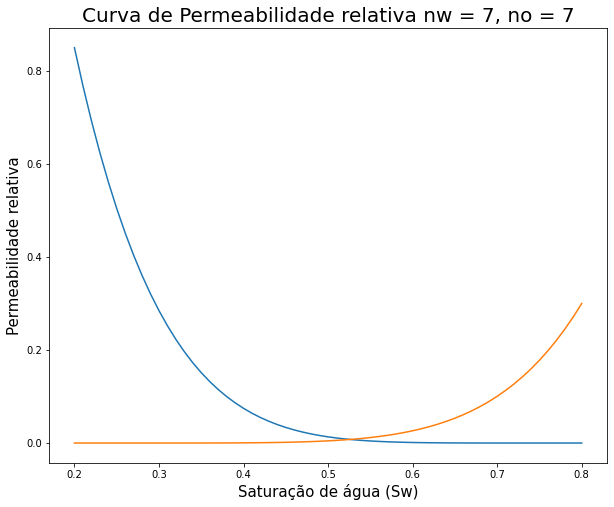

In [ ]:
#Curva de permeabilidade
fig = plt.figure(figsize=(10,8))

plt.plot(vetor_saturacao,kro_no_nw_7)
plt.plot(vetor_saturacao,krw_no_nw_7)

plt.xlabel("Saturação de água (Sw)", fontsize = 15)
plt.ylabel("Permeabilidade relativa", fontsize = 15)
plt.title("Curva de Permeabilidade relativa nw = {}, no = {}".format(nw,no), fontsize = 20)
plt.show()

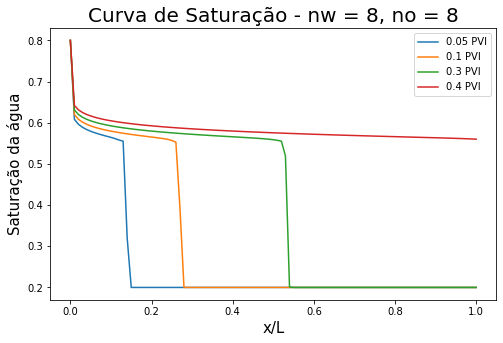

In [ ]:
#nw=no=8
#matriz_resultado_saturacao_single_point = np.insert(matriz_resultado_saturacao_single_point, 0, values = 0.8, axis=1) #Adicionando o ponto referente a condição de contorno
vetor_comprimento = np.linspace(0, 1, nx+1)
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(1,1,1)

#PVI utilizados nos labels
td_label_1= ut*500/(tam_meio_poroso*porosidade_meio)
td_label_2= ut*1000/(tam_meio_poroso*porosidade_meio)
td_label_3= ut*3000/(tam_meio_poroso*porosidade_meio)
td_label_4= ut*4000/(tam_meio_poroso*porosidade_meio)

ax.plot(vetor_comprimento, nw_no_8[49], label = "{} PVI".format(td_label_1))
ax.plot(vetor_comprimento, nw_no_8[99], label = "{} PVI".format(td_label_2))
ax.plot(vetor_comprimento, nw_no_8[199], label = "{} PVI".format(td_label_3))
ax.plot(vetor_comprimento, nw_no_8[399], label = "{} PVI".format(td_label_4))


ax.set_xlabel("x/L", fontsize=15)
ax.set_ylabel("Saturação da água", fontsize=15)
plt.title("Curva de Saturação - nw = {}, no = {}".format(nw,no), fontsize=20)
ax.legend(loc="upper right")
plt.show()

Curva de permeabilidade nw=no=8

In [ ]:
kro_no_nw_8 = kro
krw_no_nw_8 = krw

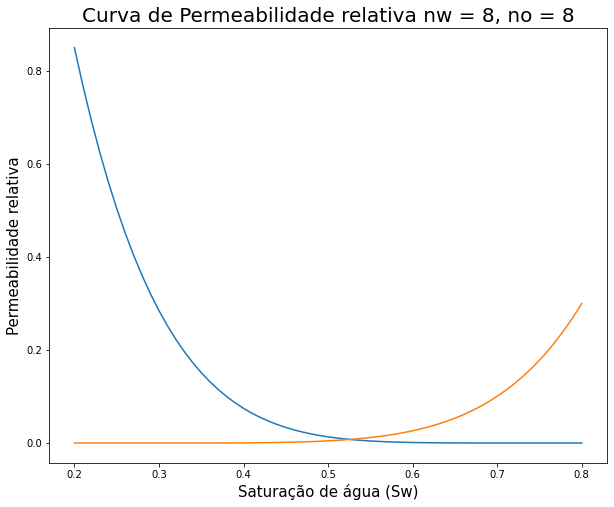

In [ ]:
#Curva de permeabilidade
fig = plt.figure(figsize=(10,8))

plt.plot(vetor_saturacao,kro_no_nw_7)
plt.plot(vetor_saturacao,krw_no_nw_7)

plt.xlabel("Saturação de água (Sw)", fontsize = 15)
plt.ylabel("Permeabilidade relativa", fontsize = 15)
plt.title("Curva de Permeabilidade relativa nw = {}, no = {}".format(nw,no), fontsize = 20)
plt.show()

Comparação entre as curvas de kro

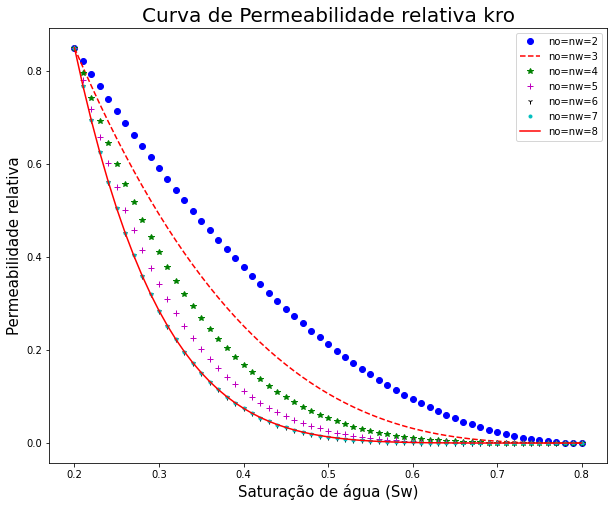

In [ ]:
#Curva de permeabilidade
fig = plt.figure(figsize=(10,8))

plt.plot(vetor_saturacao,kro_no_nw_2,'bo',label ='no=nw=2')
plt.plot(vetor_saturacao,kro_no_nw_3, 'r--',label ='no=nw=3')
plt.plot(vetor_saturacao,kro_no_nw_4, 'g*',label ='no=nw=4')
plt.plot(vetor_saturacao,kro_no_nw_5, 'm+',label ='no=nw=5')
plt.plot(vetor_saturacao,kro_no_nw_6, 'k1',label ='no=nw=6')
plt.plot(vetor_saturacao,kro_no_nw_7, 'c.',label ='no=nw=7')
plt.plot(vetor_saturacao,kro_no_nw_8, 'r-',label ='no=nw=8')


plt.xlabel("Saturação de água (Sw)", fontsize = 15)
plt.ylabel("Permeabilidade relativa", fontsize = 15)
plt.title("Curva de Permeabilidade relativa kro", fontsize = 20)
plt.legend()
plt.show()

Comparação entre as curvas de krw

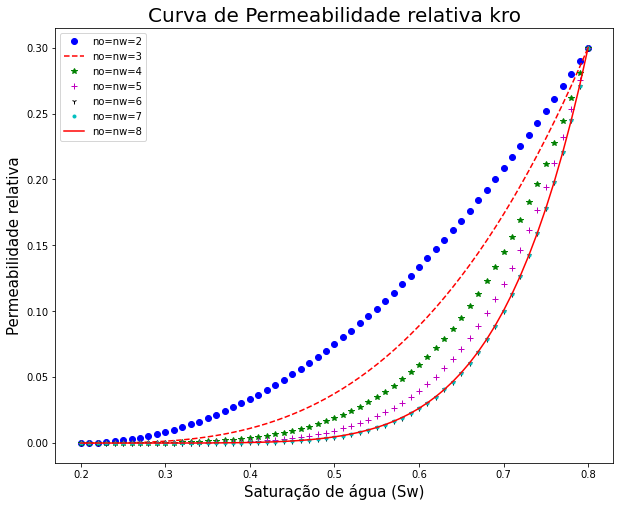

In [ ]:
#Curva de permeabilidade
fig = plt.figure(figsize=(10,8))

plt.plot(vetor_saturacao,krw_no_nw_2,'bo',label ='no=nw=2')
plt.plot(vetor_saturacao,krw_no_nw_3, 'r--',label ='no=nw=3')
plt.plot(vetor_saturacao,krw_no_nw_4, 'g*',label ='no=nw=4')
plt.plot(vetor_saturacao,krw_no_nw_5, 'm+',label ='no=nw=5')
plt.plot(vetor_saturacao,krw_no_nw_6, 'k1',label ='no=nw=6')
plt.plot(vetor_saturacao,krw_no_nw_7, 'c.',label ='no=nw=7')
plt.plot(vetor_saturacao,krw_no_nw_8, 'r-',label ='no=nw=8')


plt.xlabel("Saturação de água (Sw)", fontsize = 15)
plt.ylabel("Permeabilidade relativa", fontsize = 15)
plt.title("Curva de Permeabilidade relativa kro", fontsize = 20)
plt.legend()
plt.show()

Comparação entre as curvas de permeabilidade

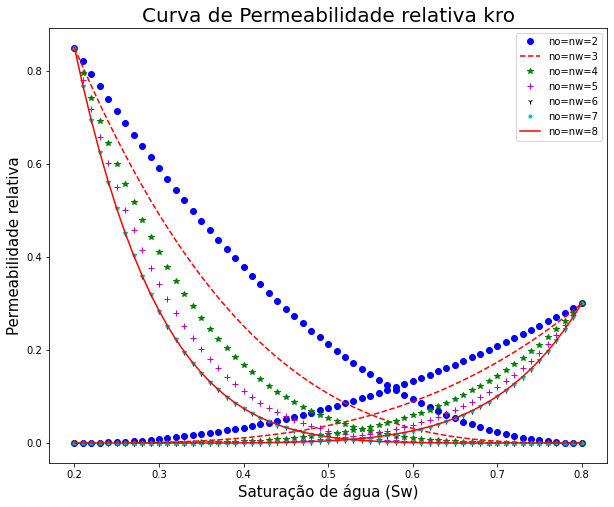

In [ ]:
#Curva de permeabilidade
fig = plt.figure(figsize=(10,8))

plt.plot(vetor_saturacao,kro_no_nw_2,'bo',label = 'no=nw=2')
plt.plot(vetor_saturacao,krw_no_nw_2,'bo')
plt.plot(vetor_saturacao,kro_no_nw_3, 'r--',label = 'no=nw=3')
plt.plot(vetor_saturacao,krw_no_nw_3, 'r--')
plt.plot(vetor_saturacao,kro_no_nw_4, 'g*',label = 'no=nw=4')
plt.plot(vetor_saturacao,krw_no_nw_4, 'g*')
plt.plot(vetor_saturacao,kro_no_nw_5, 'm+',label = 'no=nw=5')
plt.plot(vetor_saturacao,krw_no_nw_5, 'm+')
plt.plot(vetor_saturacao,kro_no_nw_6, 'k1',label = 'no=nw=6')
plt.plot(vetor_saturacao,krw_no_nw_6, 'k1')
plt.plot(vetor_saturacao,kro_no_nw_7, 'c.',label = 'no=nw=7')
plt.plot(vetor_saturacao,krw_no_nw_7, 'c.')
plt.plot(vetor_saturacao,kro_no_nw_8, 'r-',label = 'no=nw=8')
plt.plot(vetor_saturacao,krw_no_nw_8, 'r-')

plt.xlabel("Saturação de água (Sw)", fontsize = 15)
plt.ylabel("Permeabilidade relativa", fontsize = 15)
plt.title("Curva de Permeabilidade relativa kro", fontsize = 20)
plt.legend()
plt.show()

### TVD

In [ ]:
#função para o cálculo de ajuste de fluxo

def funcao_limitador(sw_i,sw_i_mais_um,sw_i_menos_um):
  numerador = mobilidade(sw_i,visc_agua,visc_oleo) - mobilidade(sw_i_menos_um,visc_agua,visc_oleo)
  denominador = mobilidade(sw_i_mais_um,visc_agua,visc_oleo)-mobilidade(sw_i,visc_agua,visc_oleo)
  if denominador == 0:
    r = 1
  else:
    r = numerador/denominador
  return r

def ajuste_fluxo(limitador_van_leer, sw_um, sw_dois):
  func_ajuste_fluxo = limitador_van_leer/2*(mobilidade(sw_um,visc_agua,visc_oleo) - mobilidade(sw_dois,visc_agua,visc_oleo))*(1-num_Courant)

  return func_ajuste_fluxo

def van_leer(r):
  if (1+r) == 0:
    fi = 1
  else:
    fi = (r+abs(r))/(1+r)
  return fi

In [ ]:
#Cálculo da saturação explicitamente utilizando o método two point upstream (ϕ=r)

#calulo do tempo de execução:
start = timeit.default_timer()

for n in tempos_de_injecao:

  #cálculo da primeira linha
  
  if n == 0:

    for i in dominio:
      if i == 0: 

        #primeiro ponto
        mobilidade_i_menos_meio = mobilidade(sw_CC,visc_agua,visc_oleo)

        #cálculo do limitador de Van Leer para o primeiro ponto
        #cálculo da função r para o primeiro ponto
        r = funcao_limitador(sw_CI,sw_CI,sw_CC)
        limitador_van_leer = van_leer(r)

        #cálculo do fluxo ajustado 
        mobilidade_i_mais_meio = mobilidade(sw_CI,visc_agua,visc_oleo) + ajuste_fluxo(limitador_van_leer,sw_CI,sw_CI) 

        #auxiliar que grava o valor do fluxo de i+1/2
        #que para próximo ponto, o fluxo i-1/2 terá o mesmo valor do auxiliar
        aux = mobilidade_i_mais_meio 
        
        #cálculo da saturação no novo passo de tempo (n+1)
        sw_n_mais_1 = dt/dx*(mobilidade_i_menos_meio - mobilidade_i_mais_meio) + sw_CI
        
        #salvando os valores na matriz resultado
        matriz_resultado_saturacao[n,i] =  sw_n_mais_1

      else:
        #outros pontos

        sw_ajustado =  sw_CI

        #cálculo do limitador de Van Leer para os demais pontos
        r = funcao_limitador(sw_CI,sw_CI,sw_CI)
        limitador_van_leer = van_leer(r)

        #Fi-1/2 = Fi-1 + limitador/2*(Fi-Fi-1)
        #mobilidade_i_menos_meio = mobilidade(sw_ajustado,visc_agua,visc_oleo) + ajuste_fluxo(limitador_van_leer,sw_CI,sw_CI) 
        mobilidade_i_menos_meio = aux

        #Fi+1/2 = Fi + limitador/2*(Fi+1-Fi)
        mobilidade_i_mais_meio = mobilidade(sw_CI,visc_agua,visc_oleo) + ajuste_fluxo(limitador_van_leer,sw_CI,sw_CI)
        
        #cálculo da saturação no novo passo de tempo (n+1)
        sw_n_mais_1 = dt/dx * (mobilidade_i_menos_meio - mobilidade_i_mais_meio) + sw_CI
        
        #salvando os valores na matriz resultado
        matriz_resultado_saturacao[n,i] =  sw_n_mais_1

        #auxiliar para guardar o valor do fluxo na face do volume de controle
        aux = mobilidade_i_mais_meio

  #Cálculo das demais linhas      
  else:

      for i in dominio:
        
        if i == 0: 
          
          #primeiro ponto
          mobilidade_i_menos_meio = mobilidade(sw_CC,visc_agua,visc_oleo)

          #cálculo do limitador
          r = funcao_limitador(matriz_resultado_saturacao[n-1,i],matriz_resultado_saturacao[n-1,i+1],matriz_resultado_saturacao[n-1,i-1])
          limitador_van_leer = van_leer(r)
          
          #Fi+1/2 = Fi + limitador/2*(Fi+1-Fi)
          mobilidade_i_mais_meio = mobilidade(matriz_resultado_saturacao[n-1,i],visc_agua,visc_oleo) + ajuste_fluxo(limitador_van_leer,matriz_resultado_saturacao[n-1,i+1],matriz_resultado_saturacao[n-1,i])
          
          #cálculo da saturação no novo passo de tempo (n+1)
          sw_n_mais_1 = dt/dx*(mobilidade_i_menos_meio - mobilidade_i_mais_meio) + matriz_resultado_saturacao[n-1,i]

                    
          #salvando os valores na matriz resultado
          matriz_resultado_saturacao[n,i] =  sw_n_mais_1

          #auxiliar para guardar o valor do fluxo na face do volume de controle
          aux = mobilidade_i_mais_meio
        
        else:
          
          #outros pontos

          #sw_ajustado =  matriz_resultado_saturacao[n-1,i-1]
          
          #cálculo do limitador
          if i == nx-1:
            r = funcao_limitador(matriz_resultado_saturacao[n-1,i],sw_CI,matriz_resultado_saturacao[n-1,i-1])
            limitador_van_leer = van_leer(r)
          else:
            r = funcao_limitador(matriz_resultado_saturacao[n-1,i],matriz_resultado_saturacao[n-1,i+1],matriz_resultado_saturacao[n-1,i-1]) 
            limitador_van_leer = van_leer(r)

          #Fi-1/2 = Fi-1 + limitador/2*(Fi-Fi-1)
          mobilidade_i_menos_meio = aux

          #Fi+1/2 = Fi + limitador/2*(Fi+1-Fi)
          
          #condição para quando chegar na fronteira de saída do domínio
          if i == nx-1:
            mobilidade_i_mais_meio = mobilidade(matriz_resultado_saturacao[n-1,i],visc_agua,visc_oleo) + ajuste_fluxo(limitador_van_leer,sw_CI,matriz_resultado_saturacao[n-1,i])
          else:
            mobilidade_i_mais_meio = mobilidade(matriz_resultado_saturacao[n-1,i],visc_agua,visc_oleo) + ajuste_fluxo(limitador_van_leer,matriz_resultado_saturacao[n-1,i+1],matriz_resultado_saturacao[n-1,i])
          
          #cálculo da saturação no novo passo de tempo (n+1)
          sw_n_mais_1 = dt/dx * (mobilidade_i_menos_meio - mobilidade_i_mais_meio) + matriz_resultado_saturacao[n-1,i]

          #salvando os valores na matriz resultado
          matriz_resultado_saturacao[n,i] =  sw_n_mais_1

          #auxiliar para guardar o valor do fluxo na face do volume de controle
          aux = mobilidade_i_mais_meio

#salvando a matriz com nome específico para poder realizar análises comparativas
matriz_resultado_saturacao_two_point = matriz_resultado_saturacao

#tempo de execução finalizado
stop = timeit.default_timer()

print('Tempo de execução: {} segundos'.format(stop-start))

Tempo de execução: 7.519961375001003 segundos


#### nw=no

In [ ]:
#Parâmetros de Corey nw=no
# nw = 2,4,6,8
nw = 8
no = nw



In [ ]:
nw_no_2_tvd = matriz_resultado_saturacao_two_point #pronto

In [ ]:
nw_no_3_tvd = matriz_resultado_saturacao_two_point #pronto

In [ ]:
nw_no_4_tvd = matriz_resultado_saturacao_two_point #pronto

In [ ]:
nw_no_5_tvd = matriz_resultado_saturacao_two_point #pronto

In [ ]:
nw_no_6_tvd = matriz_resultado_saturacao_two_point #pronto

In [ ]:
nw_no_7_tvd = matriz_resultado_saturacao_two_point #pronto

In [ ]:
nw_no_8_tvd = matriz_resultado_saturacao_two_point #pronto

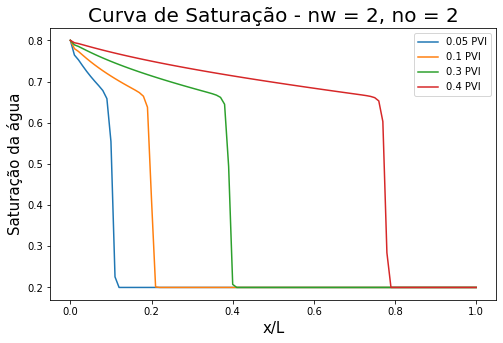

In [ ]:
#nw=no=2
nw_no_2_tvd = np.insert(nw_no_2_tvd, 0, values = 0.8, axis=1) #Adicionando o ponto referente a condição de contorno
vetor_comprimento = np.linspace(0, 1, nx+1)
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(1,1,1)

#PVI utilizados nos labels
td_label_1= ut*500/(tam_meio_poroso*porosidade_meio)
td_label_2= ut*1000/(tam_meio_poroso*porosidade_meio)
td_label_3= ut*3000/(tam_meio_poroso*porosidade_meio)
td_label_4= ut*4000/(tam_meio_poroso*porosidade_meio)

ax.plot(vetor_comprimento, nw_no_2_tvd[49], label = "{} PVI".format(td_label_1))
ax.plot(vetor_comprimento, nw_no_2_tvd[99], label = "{} PVI".format(td_label_2))
ax.plot(vetor_comprimento, nw_no_2_tvd[199], label = "{} PVI".format(td_label_3))
ax.plot(vetor_comprimento, nw_no_2_tvd[399], label = "{} PVI".format(td_label_4))


ax.set_xlabel("x/L", fontsize=15)
ax.set_ylabel("Saturação da água", fontsize=15)
plt.title("Curva de Saturação - nw = {}, no = {}".format(nw,no), fontsize=20)
ax.legend(loc="upper right")
plt.show()

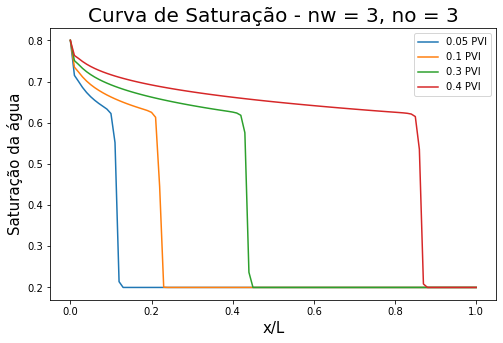

In [ ]:
#nw=no=3
nw_no_3_tvd = np.insert(nw_no_3_tvd, 0, values = 0.8, axis=1) #Adicionando o ponto referente a condição de contorno
vetor_comprimento = np.linspace(0, 1, nx+1)
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(1,1,1)

#PVI utilizados nos labels
td_label_1= ut*500/(tam_meio_poroso*porosidade_meio)
td_label_2= ut*1000/(tam_meio_poroso*porosidade_meio)
td_label_3= ut*3000/(tam_meio_poroso*porosidade_meio)
td_label_4= ut*4000/(tam_meio_poroso*porosidade_meio)

ax.plot(vetor_comprimento, nw_no_3_tvd[49], label = "{} PVI".format(td_label_1))
ax.plot(vetor_comprimento, nw_no_3_tvd[99], label = "{} PVI".format(td_label_2))
ax.plot(vetor_comprimento, nw_no_3_tvd[199], label = "{} PVI".format(td_label_3))
ax.plot(vetor_comprimento, nw_no_3_tvd[399], label = "{} PVI".format(td_label_4))


ax.set_xlabel("x/L", fontsize=15)
ax.set_ylabel("Saturação da água", fontsize=15)
plt.title("Curva de Saturação - nw = {}, no = {}".format(nw,no), fontsize=20)
ax.legend(loc="upper right")
plt.show()

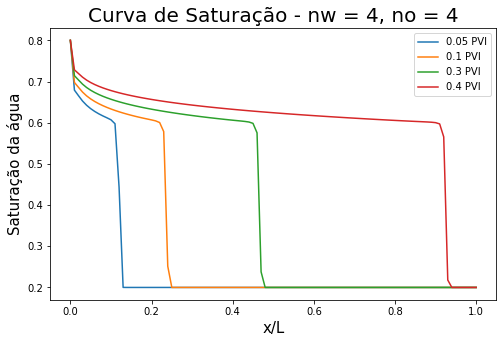

In [ ]:
#nw=no=4
nw_no_4_tvd = np.insert(nw_no_4_tvd, 0, values = 0.8, axis=1) #Adicionando o ponto referente a condição de contorno
vetor_comprimento = np.linspace(0, 1, nx+1)
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(1,1,1)

#PVI utilizados nos labels
td_label_1= ut*500/(tam_meio_poroso*porosidade_meio)
td_label_2= ut*1000/(tam_meio_poroso*porosidade_meio)
td_label_3= ut*3000/(tam_meio_poroso*porosidade_meio)
td_label_4= ut*4000/(tam_meio_poroso*porosidade_meio)

ax.plot(vetor_comprimento, nw_no_4_tvd[49], label = "{} PVI".format(td_label_1))
ax.plot(vetor_comprimento, nw_no_4_tvd[99], label = "{} PVI".format(td_label_2))
ax.plot(vetor_comprimento, nw_no_4_tvd[199], label = "{} PVI".format(td_label_3))
ax.plot(vetor_comprimento, nw_no_4_tvd[399], label = "{} PVI".format(td_label_4))


ax.set_xlabel("x/L", fontsize=15)
ax.set_ylabel("Saturação da água", fontsize=15)
plt.title("Curva de Saturação - nw = {}, no = {}".format(nw,no), fontsize=20)
ax.legend(loc="upper right")
plt.show()

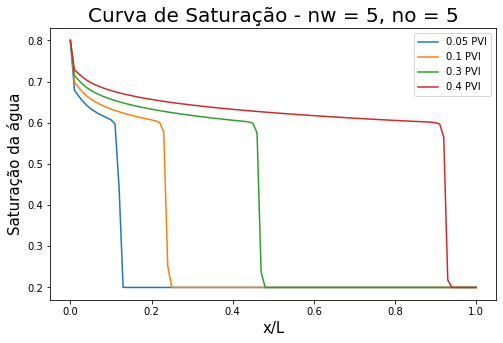

In [ ]:
#nw=no=5
nw_no_5_tvd = np.insert(nw_no_5_tvd, 0, values = 0.8, axis=1) #Adicionando o ponto referente a condição de contorno
vetor_comprimento = np.linspace(0, 1, nx+1)
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(1,1,1)

#PVI utilizados nos labels
td_label_1= ut*500/(tam_meio_poroso*porosidade_meio)
td_label_2= ut*1000/(tam_meio_poroso*porosidade_meio)
td_label_3= ut*3000/(tam_meio_poroso*porosidade_meio)
td_label_4= ut*4000/(tam_meio_poroso*porosidade_meio)

ax.plot(vetor_comprimento, nw_no_4_tvd[49], label = "{} PVI".format(td_label_1))
ax.plot(vetor_comprimento, nw_no_4_tvd[99], label = "{} PVI".format(td_label_2))
ax.plot(vetor_comprimento, nw_no_4_tvd[199], label = "{} PVI".format(td_label_3))
ax.plot(vetor_comprimento, nw_no_4_tvd[399], label = "{} PVI".format(td_label_4))


ax.set_xlabel("x/L", fontsize=15)
ax.set_ylabel("Saturação da água", fontsize=15)
plt.title("Curva de Saturação - nw = {}, no = {}".format(nw,no), fontsize=20)
ax.legend(loc="upper right")
plt.show()

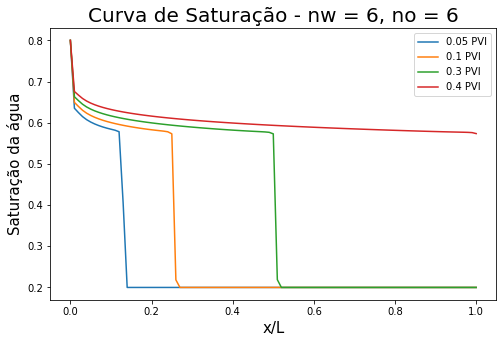

In [ ]:
#nw=no=6
nw_no_6_tvd = np.insert(nw_no_6_tvd, 0, values = 0.8, axis=1) #Adicionando o ponto referente a condição de contorno
vetor_comprimento = np.linspace(0, 1, nx+1)
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(1,1,1)

#PVI utilizados nos labels
td_label_1= ut*500/(tam_meio_poroso*porosidade_meio)
td_label_2= ut*1000/(tam_meio_poroso*porosidade_meio)
td_label_3= ut*3000/(tam_meio_poroso*porosidade_meio)
td_label_4= ut*4000/(tam_meio_poroso*porosidade_meio)

ax.plot(vetor_comprimento, nw_no_6_tvd[49], label = "{} PVI".format(td_label_1))
ax.plot(vetor_comprimento, nw_no_6_tvd[99], label = "{} PVI".format(td_label_2))
ax.plot(vetor_comprimento, nw_no_6_tvd[199], label = "{} PVI".format(td_label_3))
ax.plot(vetor_comprimento, nw_no_6_tvd[399], label = "{} PVI".format(td_label_4))


ax.set_xlabel("x/L", fontsize=15)
ax.set_ylabel("Saturação da água", fontsize=15)
plt.title("Curva de Saturação - nw = {}, no = {}".format(nw,no), fontsize=20)
ax.legend(loc="upper right")
plt.show()

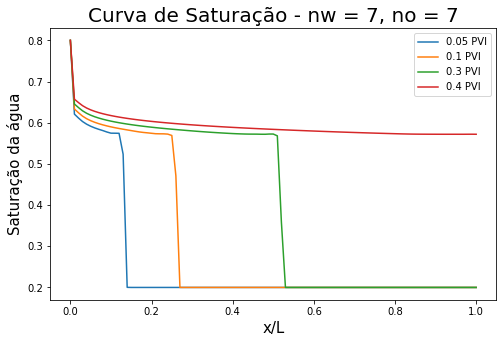

In [ ]:
#nw=no=7
nw_no_7_tvd = np.insert(nw_no_7_tvd, 0, values = 0.8, axis=1) #Adicionando o ponto referente a condição de contorno
vetor_comprimento = np.linspace(0, 1, nx+1)
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(1,1,1)

#PVI utilizados nos labels
td_label_1= ut*500/(tam_meio_poroso*porosidade_meio)
td_label_2= ut*1000/(tam_meio_poroso*porosidade_meio)
td_label_3= ut*3000/(tam_meio_poroso*porosidade_meio)
td_label_4= ut*4000/(tam_meio_poroso*porosidade_meio)

ax.plot(vetor_comprimento, nw_no_7_tvd[49], label = "{} PVI".format(td_label_1))
ax.plot(vetor_comprimento, nw_no_7_tvd[99], label = "{} PVI".format(td_label_2))
ax.plot(vetor_comprimento, nw_no_7_tvd[199], label = "{} PVI".format(td_label_3))
ax.plot(vetor_comprimento, nw_no_7_tvd[399], label = "{} PVI".format(td_label_4))


ax.set_xlabel("x/L", fontsize=15)
ax.set_ylabel("Saturação da água", fontsize=15)
plt.title("Curva de Saturação - nw = {}, no = {}".format(nw,no), fontsize=20)
ax.legend(loc="upper right")
plt.show()

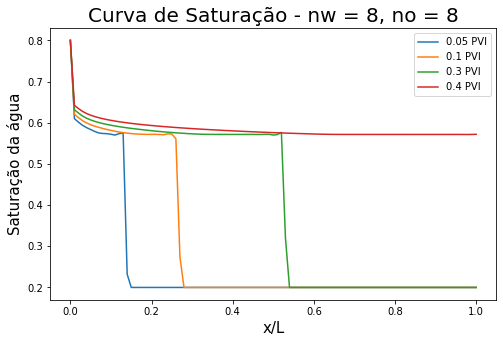

In [ ]:
#nw=no=8
nw_no_8_tvd = np.insert(nw_no_8_tvd, 0, values = 0.8, axis=1) #Adicionando o ponto referente a condição de contorno
vetor_comprimento = np.linspace(0, 1, nx+1)
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(1,1,1)

#PVI utilizados nos labels
td_label_1= ut*500/(tam_meio_poroso*porosidade_meio)
td_label_2= ut*1000/(tam_meio_poroso*porosidade_meio)
td_label_3= ut*3000/(tam_meio_poroso*porosidade_meio)
td_label_4= ut*4000/(tam_meio_poroso*porosidade_meio)

ax.plot(vetor_comprimento, nw_no_8_tvd[49], label = "{} PVI".format(td_label_1))
ax.plot(vetor_comprimento, nw_no_8_tvd[99], label = "{} PVI".format(td_label_2))
ax.plot(vetor_comprimento, nw_no_8_tvd[199], label = "{} PVI".format(td_label_3))
ax.plot(vetor_comprimento, nw_no_8_tvd[399], label = "{} PVI".format(td_label_4))


ax.set_xlabel("x/L", fontsize=15)
ax.set_ylabel("Saturação da água", fontsize=15)
plt.title("Curva de Saturação - nw = {}, no = {}".format(nw,no), fontsize=20)
ax.legend(loc="upper right")
plt.show()

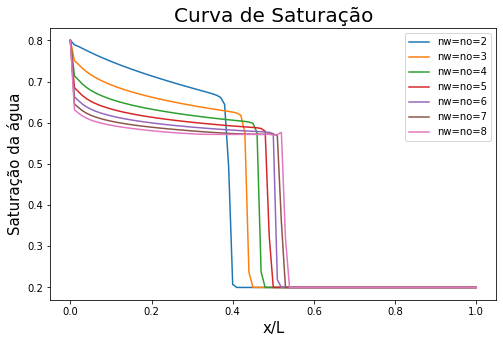

In [ ]:
vetor_comprimento = np.linspace(0, 1, nx+1)
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(1,1,1)

ax.plot(vetor_comprimento, nw_no_2_tvd[199], label = "nw=no=2")
ax.plot(vetor_comprimento, nw_no_3_tvd[199], label = "nw=no=3")
ax.plot(vetor_comprimento, nw_no_4_tvd[199], label = "nw=no=4")
ax.plot(vetor_comprimento, nw_no_5_tvd[199], label = "nw=no=5")
ax.plot(vetor_comprimento, nw_no_6_tvd[199], label = "nw=no=6")
ax.plot(vetor_comprimento, nw_no_7_tvd[199], label = "nw=no=7")
ax.plot(vetor_comprimento, nw_no_8_tvd[199], label = "nw=no=8")

ax.set_xlabel("x/L", fontsize=15)
ax.set_ylabel("Saturação da água", fontsize=15)
plt.title("Curva de Saturação", fontsize=20)
ax.legend(loc="upper right")
plt.show()

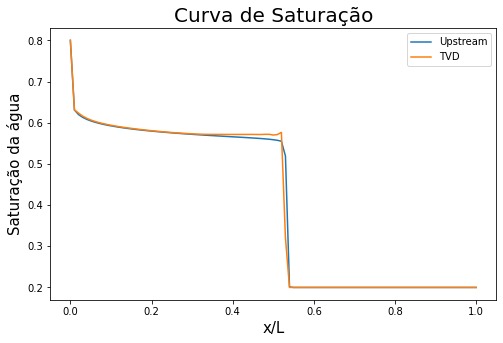

In [ ]:
vetor_comprimento = np.linspace(0, 1, nx+1)
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(1,1,1)

ax.plot(vetor_comprimento, nw_no_8[199], label = "Upstream")
ax.plot(vetor_comprimento, nw_no_8_tvd[199], label = "TVD")

ax.set_xlabel("x/L", fontsize=15)
ax.set_ylabel("Saturação da água", fontsize=15)
plt.title("Curva de Saturação", fontsize=20)
ax.legend(loc="upper right")
plt.show()

In [ ]:
nw_no_8_tvd[199]

array([0.8       , 0.63134409, 0.62343804, 0.61629657, 0.61092624,
       0.60674724, 0.60334451, 0.60047619, 0.59799642, 0.59581151,
       0.59385741, 0.59208798, 0.59046853, 0.58897213, 0.58757738,
       0.58626712, 0.58502765, 0.58384841, 0.58272194, 0.58164393,
       0.5806132 , 0.57963096, 0.5786993 , 0.57781943, 0.57699105,
       0.5762133 , 0.57548556, 0.57480616, 0.57417173, 0.57358094,
       0.57303865, 0.57255558, 0.57215362, 0.57187072, 0.57171887,
       0.57165125, 0.57161845, 0.57159689, 0.57157076, 0.57153755,
       0.57153123, 0.57153788, 0.57153679, 0.5715365 , 0.57157944,
       0.57159255, 0.57142263, 0.57140711, 0.57183903, 0.57181667,
       0.57008668, 0.57120721, 0.57646494, 0.32026409, 0.2       ,
       0.2       , 0.2       , 0.2       , 0.2       , 0.2       ,
       0.2       , 0.2       , 0.2       , 0.2       , 0.2       ,
       0.2       , 0.2       , 0.2       , 0.2       , 0.2       ,
       0.2       , 0.2       , 0.2       , 0.2       , 0.2    

### Parâmetros de Corey retirados do trabalho de Behrenbruch 2006

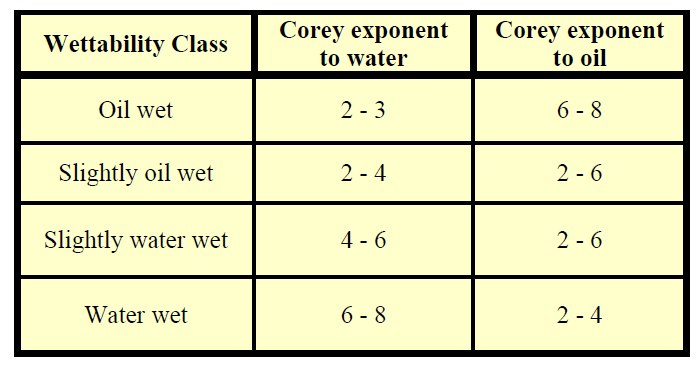

In [ ]:
#Será utilizado o sistema water-wet 
#nw = 6 - 8
#no = 2 -4
nw = 6
no = 4

In [ ]:
nw_no_6_2 = matriz_resultado_saturacao_single_point  #pronto

In [ ]:
nw_no_7_2 = matriz_resultado_saturacao_single_point #pronto

In [ ]:
nw_no_8_2 = matriz_resultado_saturacao_single_point #pronto

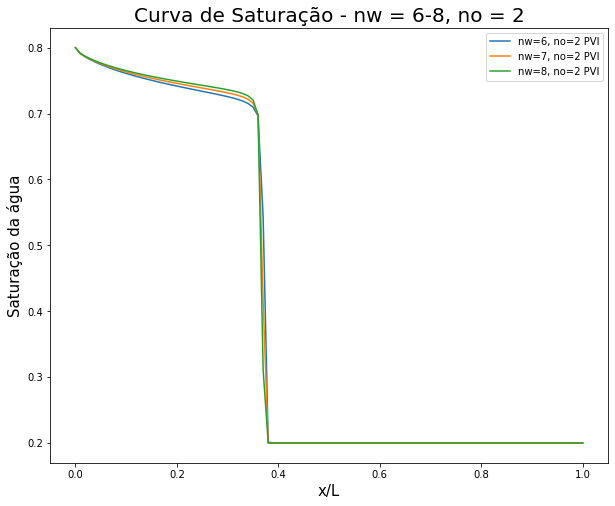

In [ ]:
#nw=6-7, no=2
#matriz_resultado_saturacao_single_point = np.insert(matriz_resultado_saturacao_single_point, 0, values = 0.8, axis=1) #Adicionando o ponto referente a condição de contorno
vetor_comprimento = np.linspace(0, 1, nx+1)
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)

ax.plot(vetor_comprimento, nw_no_6_2[199], label = "nw=6, no=2 PVI")
ax.plot(vetor_comprimento, nw_no_7_2[199], label = "nw=7, no=2 PVI")
ax.plot(vetor_comprimento, nw_no_8_2[199], label = "nw=8, no=2 PVI")

ax.set_xlabel("x/L", fontsize=15)
ax.set_ylabel("Saturação da água", fontsize=15)
plt.title("Curva de Saturação - nw = 6-8, no = 2", fontsize=20)
ax.legend(loc="upper right")
plt.show()

In [ ]:
nw_no_6_3 = matriz_resultado_saturacao_single_point  #pronto

In [ ]:
nw_no_6_4 = matriz_resultado_saturacao_single_point  #pronto

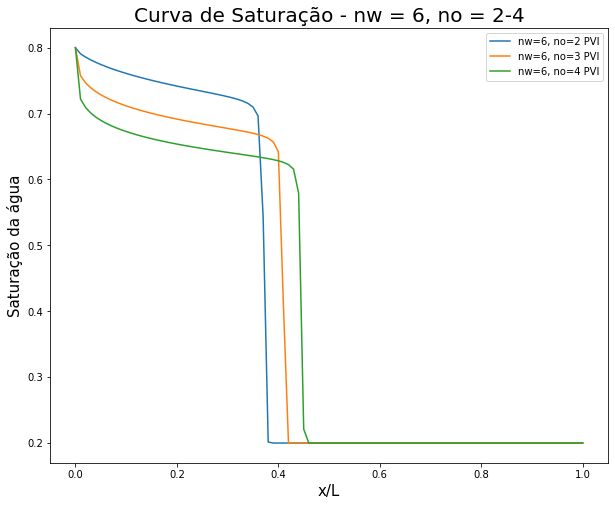

In [ ]:
#nw=6, no=2-4
#matriz_resultado_saturacao_single_point = np.insert(matriz_resultado_saturacao_single_point, 0, values = 0.8, axis=1) #Adicionando o ponto referente a condição de contorno
vetor_comprimento = np.linspace(0, 1, nx+1)
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)

ax.plot(vetor_comprimento, nw_no_6_2[199], label = "nw=6, no=2 PVI")
ax.plot(vetor_comprimento, nw_no_6_3[199], label = "nw=6, no=3 PVI")
ax.plot(vetor_comprimento, nw_no_6_4[199], label = "nw=6, no=4 PVI")

ax.set_xlabel("x/L", fontsize=15)
ax.set_ylabel("Saturação da água", fontsize=15)
plt.title("Curva de Saturação - nw = 6, no = 2-4", fontsize=20)
ax.legend(loc="upper right")
plt.show()

## Análise das viscosidades

In [ ]:
#análise das viscosidades
#μo/μw = 1,2,3,4
visc_agua = 1
visc_oleo = 1
razao_visc = visc_oleo/visc_agua
razao_visc

1.0

In [ ]:
razao_visc_1 = matriz_resultado_saturacao_single_point #pronto

In [ ]:
razao_visc_2 = matriz_resultado_saturacao_single_point #pronto

In [ ]:
razao_visc_3 = matriz_resultado_saturacao_single_point #pronto

In [ ]:
razao_visc_4 = matriz_resultado_saturacao_single_point #pronto

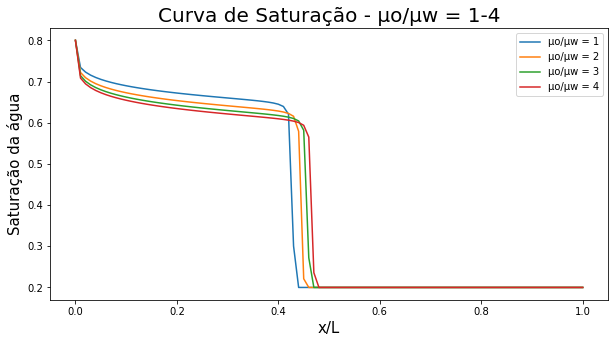

In [ ]:
#plotar os resultados
#matriz_resultado_saturacao_single_point = np.insert(matriz_resultado_saturacao_single_point, 0, values = 0.8, axis=1) #Adicionando o ponto referente a condição de contorno
vetor_comprimento = np.linspace(0, 1, nx+1)
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(1,1,1)

ax.plot(vetor_comprimento, razao_visc_1[199], label = "μo/μw = 1")
ax.plot(vetor_comprimento, razao_visc_2[199], label = "μo/μw = 2")
ax.plot(vetor_comprimento, razao_visc_3[199], label = "μo/μw = 3")
ax.plot(vetor_comprimento, razao_visc_4[199], label = "μo/μw = 4")

ax.set_xlabel("x/L", fontsize=15)
ax.set_ylabel("Saturação da água", fontsize=15)
plt.title("Curva de Saturação - μo/μw = 1-4", fontsize=20)
ax.legend(loc="upper right")
plt.show()

## Molhabilidade

Nessa seção será estudado os diferentes casos de molhabilidade, como o sistema molhável a óleo e intermediário, e verificar a influência dos pontos terminais kro_swi, krw_sor na função de permeabilidade.

In [ ]:
#Sistema molhável a água:
#krw_sor <= 0.3
#0.2 <= sor <= 0.5


Análise com diferentes krw_sor

In [ ]:
#Análise com diferentes krw_sor
krw_sor = 0.3

In [ ]:
water_wet_1 = matriz_resultado_saturacao_single_point #pronto

In [ ]:
water_wet_2 = matriz_resultado_saturacao_single_point #pronto

In [ ]:
water_wet_3 = matriz_resultado_saturacao_single_point #pronto

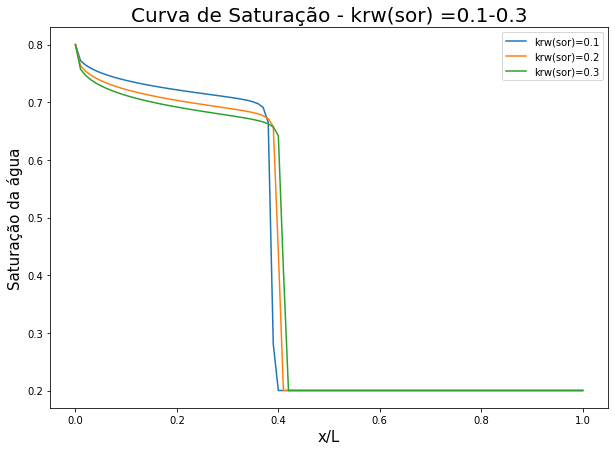

In [ ]:
#plotar os resultados
#matriz_resultado_saturacao_single_point = np.insert(matriz_resultado_saturacao_single_point, 0, values = 0.8, axis=1) #Adicionando o ponto referente a condição de contorno
vetor_comprimento = np.linspace(0, 1, nx+1)
fig = plt.figure(figsize=(10,7))
ax = plt.subplot(1,1,1)


ax.plot(vetor_comprimento, water_wet_1[199], label = "krw(sor)=0.1")
ax.plot(vetor_comprimento, water_wet_2[199], label = "krw(sor)=0.2")
ax.plot(vetor_comprimento, water_wet_3[199], label = "krw(sor)=0.3")


ax.set_xlabel("x/L", fontsize=15)
ax.set_ylabel("Saturação da água", fontsize=15)
plt.title("Curva de Saturação - krw(sor) =0.1-0.3", fontsize=20)
ax.legend(loc="upper right")
plt.show()

Análise com diferentes kro_swi = [0.7-0.9]

In [ ]:
#Análise com diferentes kro_swi = [0.7-0.9]
kro_swi = 0.9

In [ ]:
water_wet_4 = matriz_resultado_saturacao_single_point #pronto


In [ ]:
water_wet_5 = matriz_resultado_saturacao_single_point #pronto

In [ ]:
water_wet_6 = matriz_resultado_saturacao_single_point #pronto

In [ ]:
water_wet_7 = matriz_resultado_saturacao_single_point #pronto

In [ ]:
water_wet_8 = matriz_resultado_saturacao_single_point #pronto

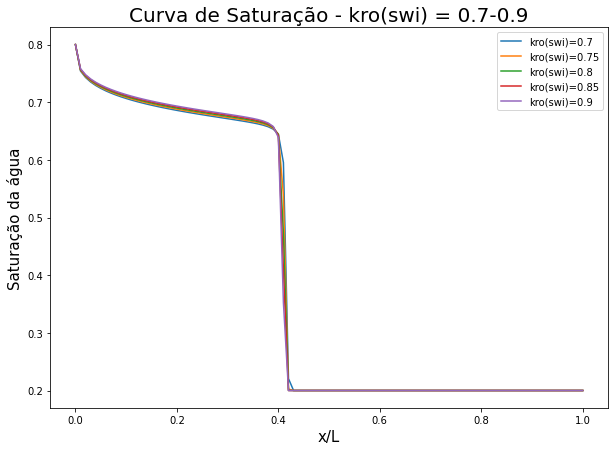

In [ ]:
#plotar os resultados
#matriz_resultado_saturacao_single_point = np.insert(matriz_resultado_saturacao_single_point, 0, values = 0.8, axis=1) #Adicionando o ponto referente a condição de contorno
vetor_comprimento = np.linspace(0, 1, nx+1)
fig = plt.figure(figsize=(10,7))
ax = plt.subplot(1,1,1)


ax.plot(vetor_comprimento, water_wet_4[199], label = "kro(swi)=0.7")
ax.plot(vetor_comprimento, water_wet_5[199], label = "kro(swi)=0.75")
ax.plot(vetor_comprimento, water_wet_6[199], label = "kro(swi)=0.8")
ax.plot(vetor_comprimento, water_wet_7[199], label = "kro(swi)=0.85")
ax.plot(vetor_comprimento, water_wet_8[199], label = "kro(swi)=0.9")


ax.set_xlabel("x/L", fontsize=15)
ax.set_ylabel("Saturação da água", fontsize=15)
plt.title("Curva de Saturação - kro(swi) = 0.7-0.9", fontsize=20)
ax.legend(loc="upper right")
plt.show()

Análise do sistema com diferentes sor

In [ ]:
#Análise do sistema com diferentes sor [0.2 - 0.5]
sor = 0.5

In [ ]:
water_wet_9 =  matriz_resultado_saturacao_single_point #pronto

In [ ]:
water_wet_10 =  matriz_resultado_saturacao_single_point #pronto

In [ ]:
water_wet_11 =  matriz_resultado_saturacao_single_point #pronto

In [ ]:
water_wet_12 =  matriz_resultado_saturacao_single_point #pronto

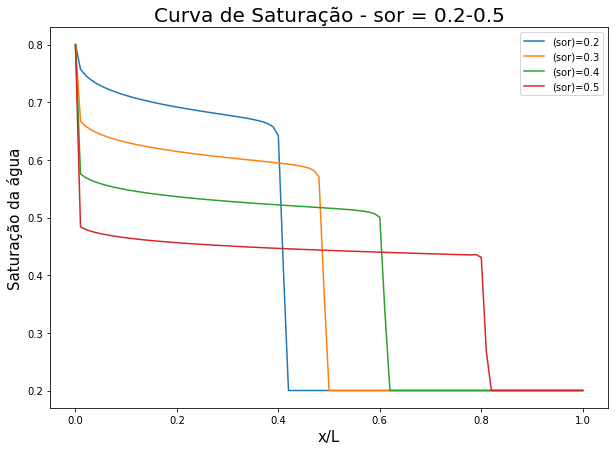

In [ ]:
#plotar os resultados
#matriz_resultado_saturacao_single_point = np.insert(matriz_resultado_saturacao_single_point, 0, values = 0.8, axis=1) #Adicionando o ponto referente a condição de contorno
vetor_comprimento = np.linspace(0, 1, nx+1)
fig = plt.figure(figsize=(10,7))
ax = plt.subplot(1,1,1)


ax.plot(vetor_comprimento, water_wet_9[199], label = "(sor)=0.2")
ax.plot(vetor_comprimento, water_wet_10[199], label = "(sor)=0.3")
ax.plot(vetor_comprimento, water_wet_11[199], label = "(sor)=0.4")
ax.plot(vetor_comprimento, water_wet_12[199], label = "(sor)=0.5")


ax.set_xlabel("x/L", fontsize=15)
ax.set_ylabel("Saturação da água", fontsize=15)
plt.title("Curva de Saturação - sor = 0.2-0.5", fontsize=20)
ax.legend(loc="upper right")
plt.show()

Análise da porosidade

In [ ]:
#análise da porosidade
porosidade_meio = 0.1

In [ ]:
water_wet_13 =  matriz_resultado_saturacao_single_point #pronto

In [ ]:
water_wet_14 =  matriz_resultado_saturacao_single_point #pronto

In [ ]:
water_wet_15 =  matriz_resultado_saturacao_single_point #pronto

In [ ]:
water_wet_16 =  matriz_resultado_saturacao_single_point #pronto

In [ ]:
water_wet_17 =  matriz_resultado_saturacao_single_point #pronto

In [ ]:
water_wet_18 =  matriz_resultado_saturacao_single_point #pronto

In [ ]:
water_wet_19 =  matriz_resultado_saturacao_single_point #pronto

In [ ]:
water_wet_20 =  matriz_resultado_saturacao_single_point #pronto

In [ ]:
water_wet_21 =  matriz_resultado_saturacao_single_point #pronto

In [ ]:
water_wet_22 =  matriz_resultado_saturacao_single_point #pronto

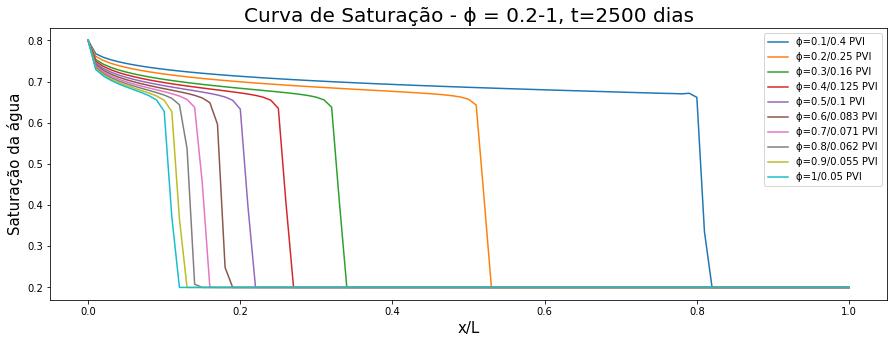

In [ ]:
#plotar os resultados
#matriz_resultado_saturacao_single_point = np.insert(matriz_resultado_saturacao_single_point, 0, values = 0.8, axis=1) #Adicionando o ponto referente a condição de contorno
vetor_comprimento = np.linspace(0, 1, nx+1)
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(1,1,1)

ax.plot(vetor_comprimento, water_wet_22[199], label = "ϕ=0.1/0.4 PVI")
ax.plot(vetor_comprimento, water_wet_13[254], label = "ϕ=0.2/0.25 PVI")
ax.plot(vetor_comprimento, water_wet_14[239], label = "ϕ=0.3/0.16 PVI")
ax.plot(vetor_comprimento, water_wet_15[249], label = "ϕ=0.4/0.125 PVI")
ax.plot(vetor_comprimento, water_wet_16[249], label = "ϕ=0.5/0.1 PVI")
ax.plot(vetor_comprimento, water_wet_17[248], label = "ϕ=0.6/0.083 PVI")
ax.plot(vetor_comprimento, water_wet_18[247], label = "ϕ=0.7/0.071 PVI")
ax.plot(vetor_comprimento, water_wet_19[247], label = "ϕ=0.8/0.062 PVI")
ax.plot(vetor_comprimento, water_wet_20[246], label = "ϕ=0.9/0.055 PVI")
ax.plot(vetor_comprimento, water_wet_21[249], label = "ϕ=1/0.05 PVI")


ax.set_xlabel("x/L", fontsize=15)
ax.set_ylabel("Saturação da água", fontsize=15)
plt.title("Curva de Saturação - ϕ = 0.2-1, t=2500 dias", fontsize=20)
ax.legend(loc="upper right")
plt.show()

In [ ]:
t = 0.05*(tam_meio_poroso*1)/ut
t

2500.0

In [ ]:
pvi = ut*2500/(tam_meio_poroso*0.1)
pvi

0.5

Sistema molhável a óleo

In [ ]:
#Sistema molhável a óleo:
#swi <=0.1
#sor = 0.05
#krw_sor >=0.5
#krw_sor = kro_swi

In [ ]:
#Características do sistema molhável a óleo
#saturação inicial
swi = 0.1
#saturação de óleo residual
sor = 0.05
#permeabilidade relativa da água na saturação residual
krw_sor = 0.7 
#permeabilidade relativa do óleo na saturação residual
kro_swi = 0.7 
#porosidade
porosidade = porosidade_meio
#parâmetros de Corey
no = 6
nw = 3

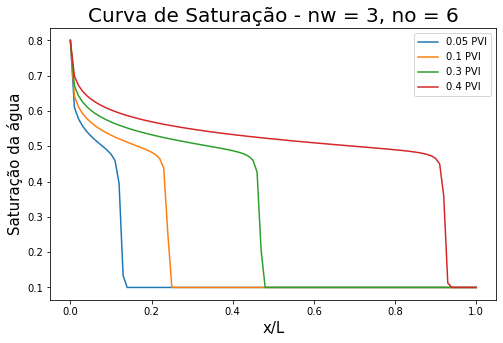

In [ ]:
#plotar os resultados
#matriz_resultado_saturacao_single_point = np.insert(matriz_resultado_saturacao_single_point, 0, values = 0.8, axis=1) #Adicionando o ponto referente a condição de contorno
vetor_comprimento = np.linspace(0, 1, nx+1)
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(1,1,1)

#PVI utilizados nos labels
td_label_1= ut*500/(tam_meio_poroso*porosidade_meio)
td_label_2= ut*1000/(tam_meio_poroso*porosidade_meio)
td_label_3= ut*3000/(tam_meio_poroso*porosidade_meio)
td_label_4= ut*4000/(tam_meio_poroso*porosidade_meio)

ax.plot(vetor_comprimento, matriz_resultado_saturacao_single_point[49], label = "{} PVI".format(td_label_1))
ax.plot(vetor_comprimento, matriz_resultado_saturacao_single_point[99], label = "{} PVI".format(td_label_2))
ax.plot(vetor_comprimento, matriz_resultado_saturacao_single_point[199], label = "{} PVI".format(td_label_3))
ax.plot(vetor_comprimento, matriz_resultado_saturacao_single_point[399], label = "{} PVI".format(td_label_4))


ax.set_xlabel("x/L", fontsize=15)
ax.set_ylabel("Saturação da água", fontsize=15)
plt.title("Curva de Saturação - nw = {}, no = {}".format(nw,no), fontsize=20)
ax.legend(loc="upper right")
plt.show()

Sistema intermediário

In [ ]:
#Sistema intermediário:
#0.2<=krw_sor<=0.5
#0.1<=sor<=0.2

In [ ]:
#Características do sistema com molhabilidade não uniforme
#saturação inicial
swi = 0.1
#saturação de óleo residual
sor = 0.2
#permeabilidade relativa da água na saturação residual
krw_sor = 0.8 
#permeabilidade relativa do óleo na saturação residual
kro_swi = 0.5
#porosidade
porosidade = porosidade_meio
#parâmetros de Corey
no = 2
nw = 4

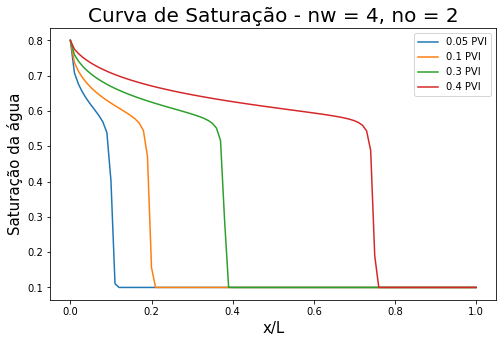

In [ ]:
#plotar os resultados
#matriz_resultado_saturacao_single_point = np.insert(matriz_resultado_saturacao_single_point, 0, values = 0.8, axis=1) #Adicionando o ponto referente a condição de contorno
vetor_comprimento = np.linspace(0, 1, nx+1)
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(1,1,1)

#PVI utilizados nos labels
td_label_1= ut*500/(tam_meio_poroso*porosidade_meio)
td_label_2= ut*1000/(tam_meio_poroso*porosidade_meio)
td_label_3= ut*3000/(tam_meio_poroso*porosidade_meio)
td_label_4= ut*4000/(tam_meio_poroso*porosidade_meio)

ax.plot(vetor_comprimento, matriz_resultado_saturacao_single_point[49], label = "{} PVI".format(td_label_1))
ax.plot(vetor_comprimento, matriz_resultado_saturacao_single_point[99], label = "{} PVI".format(td_label_2))
ax.plot(vetor_comprimento, matriz_resultado_saturacao_single_point[199], label = "{} PVI".format(td_label_3))
ax.plot(vetor_comprimento, matriz_resultado_saturacao_single_point[399], label = "{} PVI".format(td_label_4))


ax.set_xlabel("x/L", fontsize=15)
ax.set_ylabel("Saturação da água", fontsize=15)
plt.title("Curva de Saturação - nw = {}, no = {}".format(nw,no), fontsize=20)
ax.legend(loc="upper right")
plt.show()